## Multi-Class Classification

take clustered data, classify

In [35]:
# check installed version
import pycaret
import pandas as pd
pycaret.__version__

'3.0.4'

In [36]:
#get latest experiment in the clustered directory
import os
import glob

def newest_file(directory):
    list_of_files = glob.glob(directory + '/*')
    latest_file = max(list_of_files, key=os.path.getctime)
    return latest_file

In [37]:
latestEXP = newest_file("clustered")
print(latestEXP)
load_clustered = pd.read_csv(latestEXP) #'clustered/clustered_meanshift _2023-09-04 14:59:41.csv'
load_clustered

clustered/clustered_sc _2023-09-09 19:45:53.csv


,Unnamed: 0,precursor_buy_cap_pct_change,precursor_ask_cap_pct_change,precursor_bid_vol_pct_change,precursor_ask_vol_pct_change,change.1,surge_targets_met_pct,Cluster
0,1,-0.000443,0.000023,-0.000184,0.003196,0.000135,-0.033490,Cluster 0
1,2,-0.002358,-0.000002,-0.000818,-0.000333,-0.000233,-0.033445,Cluster 0
2,3,0.000349,0.000031,0.000189,0.004485,-0.000502,-0.033467,Cluster 0
3,4,0.000473,0.000015,0.000120,0.001861,-0.000768,-0.167224,Cluster 0
4,5,0.006050,0.000020,0.002144,0.003015,-0.000303,-0.371245,Cluster 0
...,...,...,...,...,...,...,...,...
5627,5631,0.000261,-0.003409,0.000050,-0.016427,-0.000398,-0.199005,Cluster 0
5628,5632,-0.008493,-0.001014,-0.002097,-0.004181,-0.283913,0.000000,Cluster 0
5629,5633,-0.002290,0.000014,-0.000566,0.000067,0.000399,0.000000,Cluster 0
5630,5634,-0.002373,-0.000333,-0.000586,-0.001572,0.000000,-0.099701,Cluster 0


In [38]:
# clustered.drop(['group', 'time', 's_MP', 'change', 'type', 'length', 'sum_change', 'surge_area' ] , axis=1, inplace=True) 
print(load_clustered.columns)

Index(['Unnamed: 0', 'precursor_buy_cap_pct_change',
       'precursor_ask_cap_pct_change', 'precursor_bid_vol_pct_change',
       'precursor_ask_vol_pct_change', 'change.1', 'surge_targets_met_pct',
       'Cluster'],
      dtype='object')


In [39]:
#eliminate surge columns, 'change', 'sum_change','surge_area',
keepable = ['precursor_buy_cap_pct_change',
       'precursor_ask_cap_pct_change', 
        'precursor_bid_vol_pct_change',
       'precursor_ask_vol_pct_change', 
        'change.1', 
        'Cluster']
clustered = load_clustered[keepable]

In [40]:
#setup 
from pycaret.classification import *
s = setup(clustered, target = 'Cluster', session_id = 42, normalize = True)

,Description,Value
0,Session id,42
1,Target,Cluster
2,Target type,Binary
3,Target mapping,"Cluster 0: 0, Cluster 2: 1"
4,Original data shape,"(5632, 6)"
5,Transformed data shape,"(5632, 6)"
6,Transformed train set shape,"(3942, 6)"
7,Transformed test set shape,"(1690, 6)"
8,Numeric features,5
9,Preprocess,True


In [41]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [42]:
type(exp)


pycaret.classification.oop.ClassificationExperiment

In [43]:
exp.setup(clustered, target = 'Cluster', session_id = 42)


,Description,Value
0,Session id,42
1,Target,Cluster
2,Target type,Binary
3,Target mapping,"Cluster 0: 0, Cluster 2: 1"
4,Original data shape,"(5632, 6)"
5,Transformed data shape,"(5632, 6)"
6,Transformed train set shape,"(3942, 6)"
7,Transformed test set shape,"(1690, 6)"
8,Numeric features,5
9,Preprocess,True


In [44]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9982,0.3480,0.0000,0.0000,0.0000,nan,0.0000,0.0570
ridge,Ridge Classifier,0.9982,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0320
rf,Random Forest Classifier,0.9982,0.3311,0.0000,0.0000,0.0000,nan,0.0000,0.2140
xgboost,Extreme Gradient Boosting,0.9982,0.4305,0.0000,0.0000,0.0000,nan,0.0000,0.1040
lightgbm,Light Gradient Boosting Machine,0.9982,0.4118,0.0000,0.0000,0.0000,nan,0.0000,119.4160
dummy,Dummy Classifier,0.9982,0.3500,0.0000,0.0000,0.0000,nan,0.0000,0.0350
lr,Logistic Regression,0.9980,0.3678,0.0000,0.0000,0.0000,nan,-0.0003,0.3450
ada,Ada Boost Classifier,0.9980,0.4568,0.0000,0.0000,0.0000,nan,-0.0003,0.1290
et,Extra Trees Classifier,0.9980,0.3331,0.0000,0.0000,0.0000,nan,-0.0003,0.1760
svm,SVM - Linear Kernel,0.9977,0.0000,0.0000,0.0000,0.0000,nan,-0.0005,0.0360


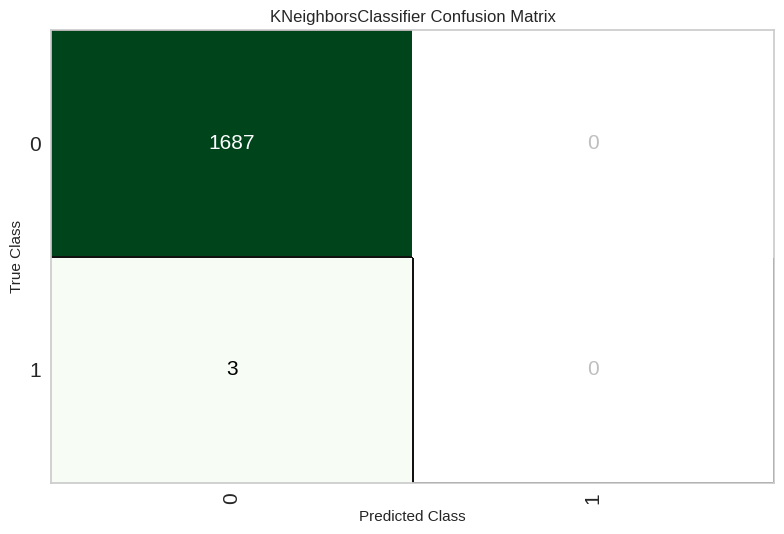

In [45]:
plot_model(best, plot = 'confusion_matrix')

In [46]:
# plot_model(best, plot = 'auc')


In [47]:
# plot_model(best, plot = 'efficiency')
# # 

In [48]:
evaluate_model(best)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [49]:
holdout_pred = predict_model(best)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9982,0.4985,0.0000,0.0000,0.0000,0.0000,0.0000


In [50]:
holdout_pred.head()


,precursor_buy_cap_pct_change,precursor_ask_cap_pct_change,precursor_bid_vol_pct_change,precursor_ask_vol_pct_change,change.1,Cluster,prediction_label,prediction_score
3408,-0.008292,0.000688,-0.002808,0.005277,-0.004324,0,Cluster 0,1.0
2067,-0.001969,-0.001618,-0.001320,-0.005680,0.000072,0,Cluster 0,1.0
306,-0.076135,-0.000144,-0.033530,-0.030216,-0.000719,0,Cluster 0,1.0
973,-0.007536,-0.000416,-0.001200,-0.013021,0.000300,0,Cluster 0,1.0
2916,0.410845,0.113147,0.154930,0.311443,-0.002808,0,Cluster 0,1.0


### loading a model

In [51]:
# check installed version
import pycaret
import pandas as pd
pycaret.__version__

'3.0.4'

In [52]:
# functional API
# loaded_model = load_model('iforest_pipeline')
# print(loaded_model)

# OOP API
# loaded_model = s.load_model('kmeans_pipeline')
# print(loaded_model)